In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyopenms import *

In [2]:
def get_unique(base_name):
    peptides = []
    with open("../Results/{}_peptide_hits".format(base_name), "r") as src:
        for line in src:
            line = line.split()[0]
            line = line.split(",")
            if len(line) > 1:
                peptides += line[1:]
                
    decoys = []
    with open("../Results/{}_decoy_hits".format(base_name), "r") as src:
        for line in src:
            line = line.split()[0]
            line = line.split(",")
            if len(line) > 1:
                decoys += line[1:]
                
    return np.unique(peptides), np.unique(decoys)

def count_selections(base_name):
    idx = []
    peptide_counts = []
    with open("../Results/{}_peptide_hits".format(base_name), "r") as src:
        for line in src:
            line = line.split()[0]
            line = line.split(",")
            idx.append(line[0])
            peptide_counts.append(len(line) - 1)
            
    decoy_counts = []
    with open("../Results/{}_decoy_hits".format(base_name), "r") as src:
        for line in src:
            line = line.split()[0]
            line = line.split(",")
            decoy_counts.append(len(line) - 1)
            
    peptide_df = pd.DataFrame({"frame": idx, "peptides": peptide_counts, "decoys": decoy_counts})
    
    return peptide_df

In [3]:
unique_peptides = []
unique_decoys = []
for ind in range(11):
    counts = get_unique("UWPROFL0362_{}".format(ind))
    unique_peptides.append(counts[0])
    unique_decoys.append(counts[1])
    
unique_peptide_counts = np.array([u.shape[0] for u in unique_peptides])
unique_decoy_counts = np.array([u.shape[0] for u in unique_decoys])

In [4]:
lam_path = np.logspace(start=5, stop=10, num=11)

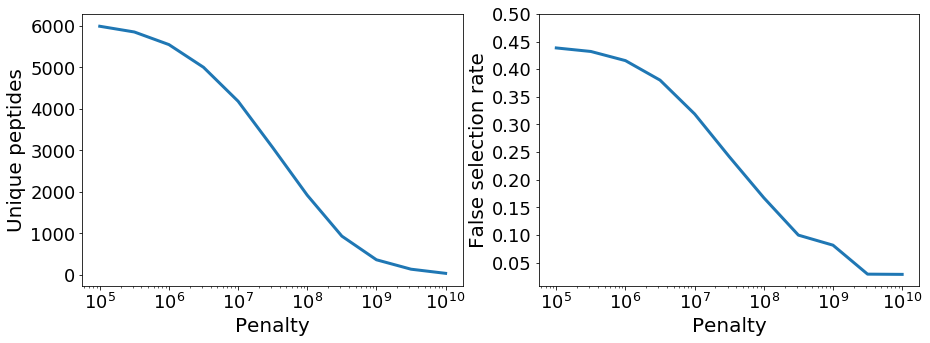

In [17]:
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(15, 5))

axs[0].plot(lam_path, unique_peptide_counts, lw = 3)
axs[0].set_xscale('log')
axs[0].set_xlabel("Penalty", size = 20)
axs[0].set_ylabel("Unique peptides", size = 20)
axs[0].tick_params(labelsize=18)

axs[1].plot(lam_path, unique_decoy_counts/(unique_decoy_counts + unique_peptide_counts), lw = 3)
axs[1].set_xscale('log')
axs[1].set_yticks(np.linspace(0.05, .5, 10))
axs[1].set_xlabel("Penalty", size = 20)
axs[1].set_ylabel("False selection rate", size = 20)
axs[1].tick_params(labelsize=18)
plt.savefig("selection_vs_penalty.png")
plt.show()

In [11]:
def count_silac_pairs(arr):
    mod_arr = [re.sub('K[^a-zA-Z\/]+', "K", p) for p in arr]
    return arr.shape[0] - np.unique(mod_arr).shape[0]

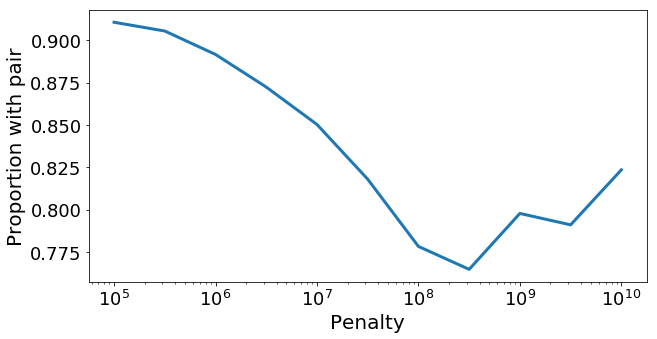

In [19]:
number_of_pairs = np.array([count_silac_pairs(pep) for pep in unique_peptides])
plt.figure(figsize = (10, 5))
plt.plot(lam_path, 2*number_of_pairs/unique_peptide_counts, lw=3)
plt.xscale("log")
plt.xlabel("Penalty", size = 20)
plt.ylabel("Proportion with pair", size = 20)
plt.tick_params(labelsize=18)
plt.savefig("pairs_vs_penalty.png")
plt.show()